# <font color="orange"> Linear Regression Project: Car Price Prediction </font>

In [1]:
# Requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdp
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
plt.style.use('_mpl-gallery')

In [2]:
# Requirement tools from sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics

In [3]:
import tkinter as tk
from tkinter import ttk
import tkinter.messagebox

In [4]:
# import dataset
data = pd.read_csv('cardata.csv')

In [5]:
df = pd.DataFrame(data)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [6]:
# pdp.ProfileReport(df)

In [7]:
# clean car_name because of we do not need this column
df.drop(['Car_Name'], axis='columns', inplace=True)

## <font color="orange"> 1. Dataset Overveiw </font>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


## <font color="orange"> 2. Cleaning & Preparing Data </font>

In [9]:
# first check missing values:
df.isna().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

It seems that we don't have a missing value, but there may be a syntax error inside the category data. Therefore, we check this using barplot:

In [10]:
# split dataset to categorical and numerical features
df_cat= df.select_dtypes(['object'])  
df_num = df.select_dtypes(['int64', 'float64'])

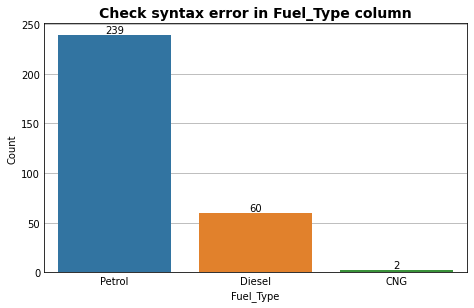

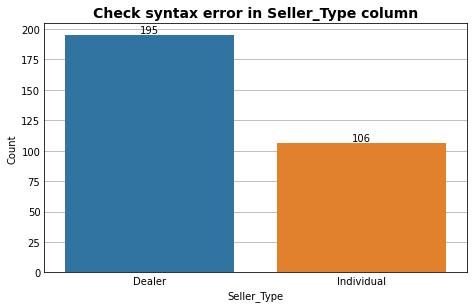

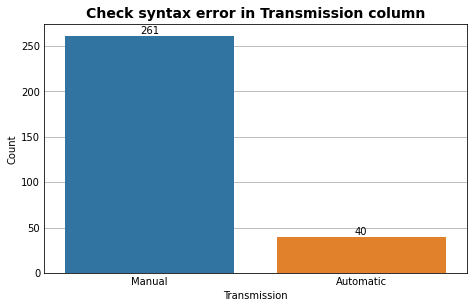

In [11]:
# draw barplot for check syntax error in categorical features:
%matplotlib inline
for col in df_cat:
    check_syntax = df_cat[col].value_counts().to_frame().reset_index()
    check_syntax.rename(columns={f'{col}': 'Count', 'index':f'{col}'}, inplace=True)
    ax = sns.barplot(data=check_syntax, x=f'{col}', y='Count')
    ax.bar_label(ax.containers[0])
    plt.title(f"Check syntax error in {col} column", fontsize=14, fontweight='bold')
    plt.show()

# we can use this code for each feature instead of above code
# df_cat.Fuel_Type.value_counts().plot.barh()

In [12]:
# find number of duplicated data:
df.duplicated().sum()

2

In [13]:
df[df.duplicated()]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [14]:
# now we delete duplicated data
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
294,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
295,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
296,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
297,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [15]:
# before check noise convert Year columns to Age:
df2 = df.copy()
df2['Age'] = (df.Year.max()+1) - df.Year
df2.drop(['Year'], axis='columns', inplace=True)
df2

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,5
...,...,...,...,...,...,...,...,...
294,9.50,11.60,33988,Diesel,Dealer,Manual,0,3
295,4.00,5.90,60000,Petrol,Dealer,Manual,0,4
296,3.35,11.00,87934,Petrol,Dealer,Manual,0,10
297,11.50,12.50,9000,Diesel,Dealer,Manual,0,2


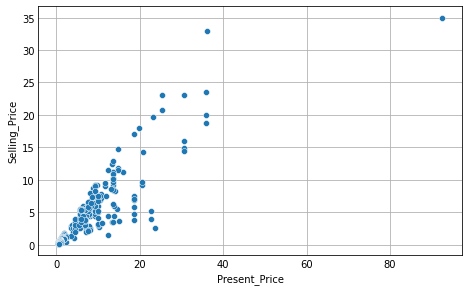

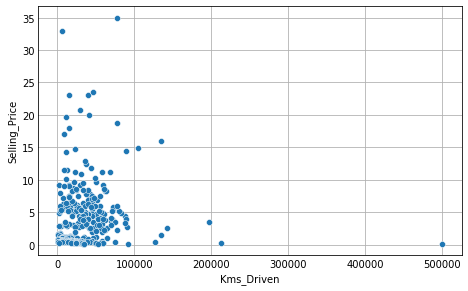

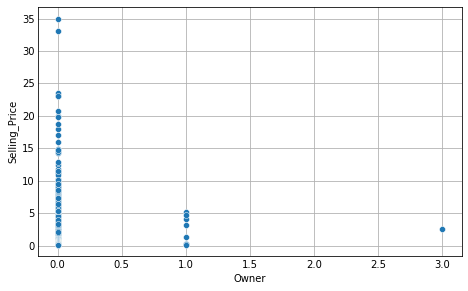

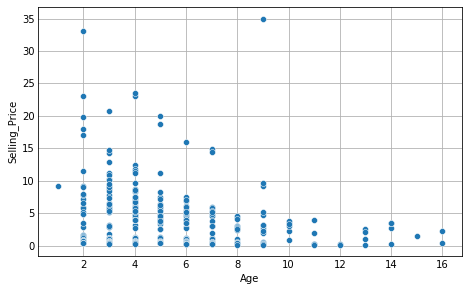

In [16]:
# now check the noise:


%matplotlib inline
for col in df2[['Present_Price', 'Kms_Driven', 'Owner', 'Age']]:
    sns.scatterplot(data=df2, x=col, y=df2.Selling_Price)
    plt.show()



Maybe some data pints look like noise, but according to the type of data, they cannot be considered noise even though they are far from the rest of the data.

## <font color="orange"> 3.Exploratory Data Analysis (EDA) </font>

#### <font color="orange"> 3.1. Categorical Univariate Analysis: </font>

In [17]:
# fist split df2 to categorical and numerical data:
df2_num = df2.select_dtypes(['int64', 'float64'])
df2_cat = df2.select_dtypes(['object'])

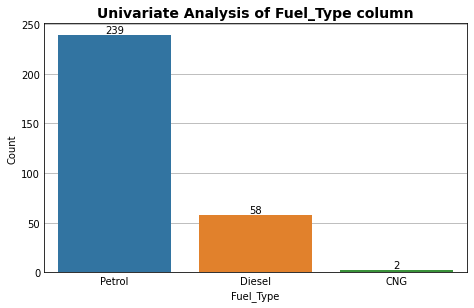

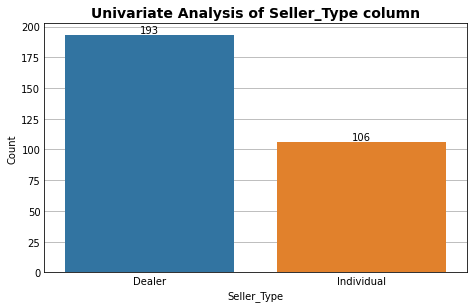

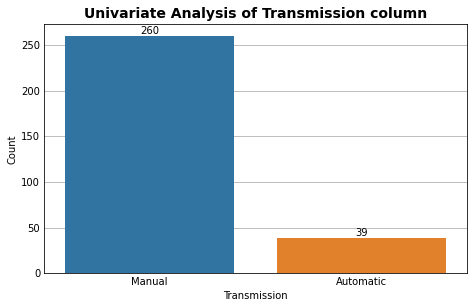

In [18]:
# draw barplot again for categorical univariate analysis:
%matplotlib inline
for col in df2_cat:
    check_syntax = df2_cat[col].value_counts().to_frame().reset_index()
    check_syntax.rename(columns={f'{col}': 'Count', 'index':f'{col}'}, inplace=True)
    ax = sns.barplot(data=check_syntax, x=f'{col}', y='Count')
    ax.bar_label(ax.containers[0])
    plt.title(f"Univariate Analysis of {col} column", fontsize=14, fontweight='bold')
    plt.show()

# we can use this code for each feature instead of above code
# df_cat.Fuel_Type.value_counts().plot.barh()

#### <font color="orange"> 3.2. Numerical Univariate Analysis: </font>

In [19]:
df2_cat.describe().T

,count,unique,top,freq
Fuel_Type,299,3,Petrol,239
Seller_Type,299,2,Dealer,193
Transmission,299,2,Manual,260


In [20]:
df2_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Selling_Price,299.0,4.589632,4.984240,0.10,0.85,3.51,6.00,35.0
Present_Price,299.0,7.541037,8.567887,0.32,1.20,6.10,9.84,92.6
Kms_Driven,299.0,36916.752508,39015.170352,500.00,15000.00,32000.00,48883.50,500000.0
Owner,299.0,0.043478,0.248720,0.00,0.00,0.00,0.00,3.0
Age,299.0,5.384615,2.896868,1.00,3.00,5.00,7.00,16.0


#### <font color="orange"> 3.3. Numeric - Numeric Bivariate Analysis: </font>

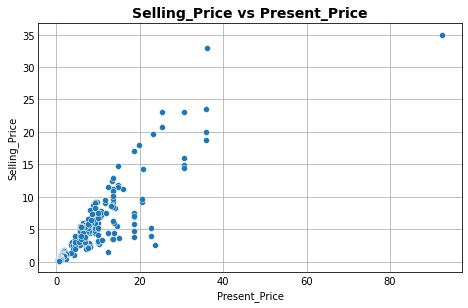

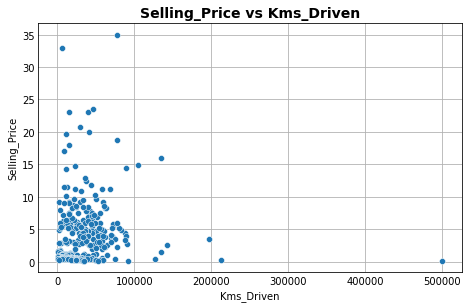

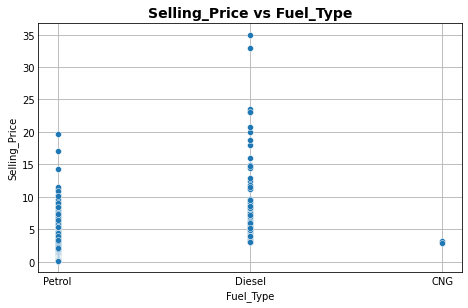

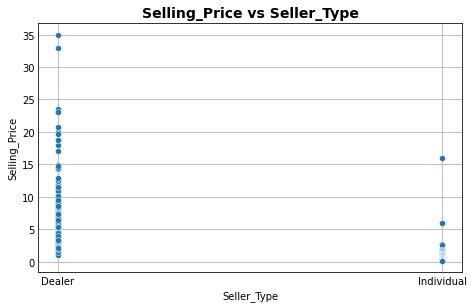

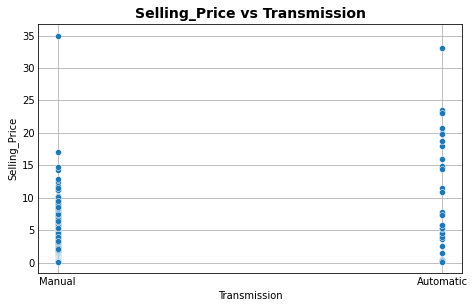

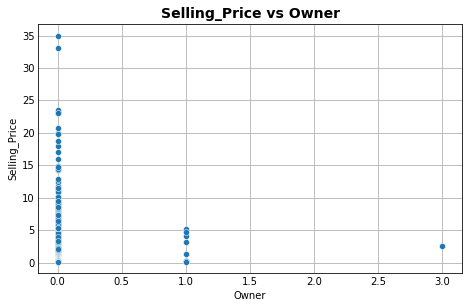

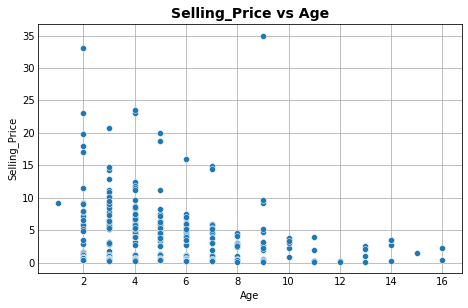

In [21]:
%matplotlib inline
for col in df2.columns[1:]:
    sns.scatterplot(x=df2[col], y=df2.Selling_Price)
    plt.title(f'Selling_Price vs {col}', fontsize=14, fontweight='bold')
    plt.show()

For a more detailed examination, the Kms_Driven and Selling_Price plot of the range from 0 to 100,000 km are also drawn:

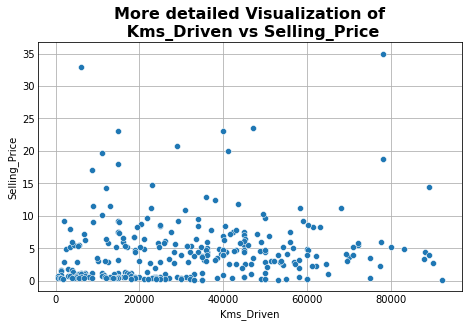

In [22]:
%matplotlib inline
sns.scatterplot(data=df2[df2.Kms_Driven < 100000], x='Kms_Driven' , y = 'Selling_Price')
plt.title('More detailed Visualization of\n Kms_Driven vs Selling_Price', fontsize=16, fontweight='bold')
plt.show()

As seen in all the charts above, there is no data between 25 and 30 Selling_Price, and after 30 there are a handful of data points that may be noise and cause problems in learning the model, but as mentioned below As a precaution, we do the modeling once without removing them and once with removing them.

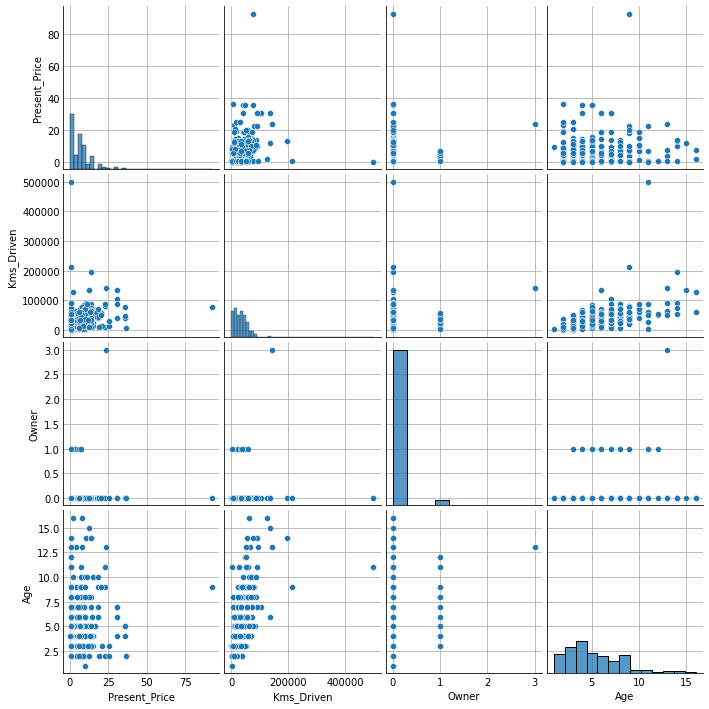

In [23]:
# checking feature by feature:
%matplotlib inline
ax = sns.pairplot(df2.iloc[:,1:])
plt.show()


For a more detailed examination, the Kms_Driven and Present_Price plot of the range from 0 to 200,000 km are also drawn:

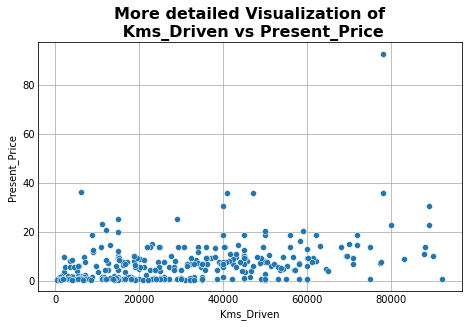

In [24]:
%matplotlib inline
sns.scatterplot(data=df2[df2.Kms_Driven < 100000], x='Kms_Driven' , y = 'Present_Price')
plt.title('More detailed Visualization of\n Kms_Driven vs Present_Price', fontsize=16, fontweight='bold')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

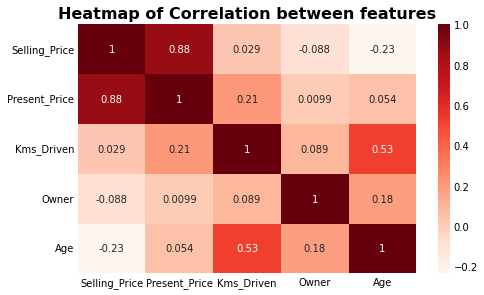

In [25]:
# for best visualizing the correlation of features we drawing heatmap:
%matplotlib inline
sns.heatmap(df2.corr(), annot=True, cmap='Reds')
plt.title('Heatmap of Correlation between features', fontsize=16, fontweight='bold')
plt.show

#### <font color="orange"> 3.3. Numeric - Categoric Bivariate Analysis: </font>

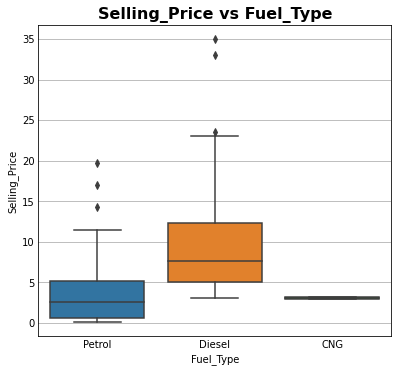

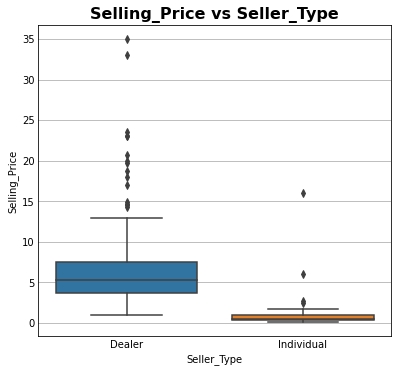

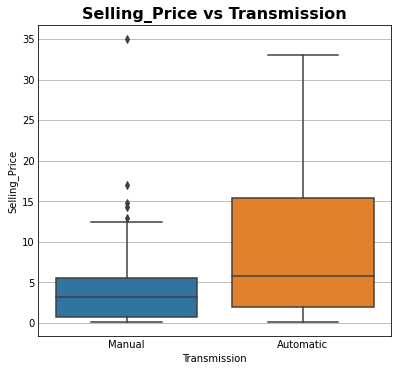

In [26]:
# for this goal we using boxplot
%matplotlib inline
for col in df2.select_dtypes(['object']):
    plt.figure(figsize=(5,5))
    sns.boxplot(x=df2[col], y=df2.Selling_Price)
    plt.title(f"Selling_Price vs {col}", fontsize=16, fontweight='bold')
    plt.show()

#### <font color="orange"> 3.4. Categoric - Categoric Bivariate Analysis: </font>

In [27]:
# create Transmission rate of numeric data type where Tramsmission "Automatic"= 1, "Manual" =0
df3 = df2.copy()
df3['Transmission_rate'] = np.where(df3.Transmission == 'Automatic', 1, 0)
df3.Transmission_rate.value_counts()

0    260
1     39
Name: Transmission_rate, dtype: int64

In [28]:
# create Seller_Type rate of numeric data type where Transmission "Dealer"= 1, "Individual" =0
df3['Seller_Type_rate'] = np.where(df3.Seller_Type == 'Dealer', 1, 0)
df3.Seller_Type_rate.value_counts()

1    193
0    106
Name: Seller_Type_rate, dtype: int64

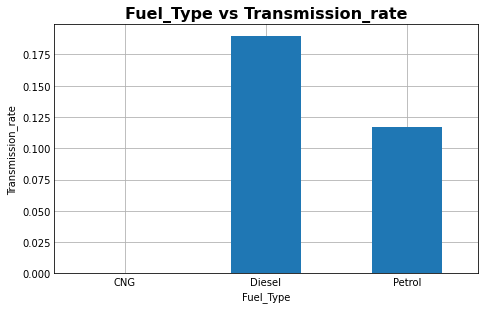

In [29]:
# plot the barplot of Fuel_Type with average value of Transnission_rate:
%matplotlib inline
df3.groupby('Fuel_Type')['Transmission_rate'].mean().plot.bar()
plt.title('Fuel_Type vs Transmission_rate', fontsize=16, fontweight='bold')
plt.ylabel('Transmission_rate')
plt.xticks(rotation=0)
plt.show()

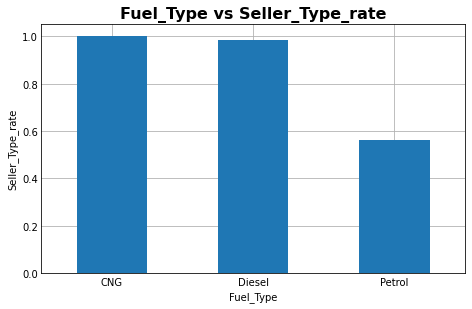

In [30]:
# plot the barplot of Fuel_Type with average value of Seller_Type_rate:
%matplotlib inline
df3.groupby('Fuel_Type')['Seller_Type_rate'].mean().plot.bar()
plt.title('Fuel_Type vs Seller_Type_rate', fontsize=16, fontweight='bold')
plt.ylabel('Seller_Type_rate')
plt.xticks(rotation=0)
plt.show()

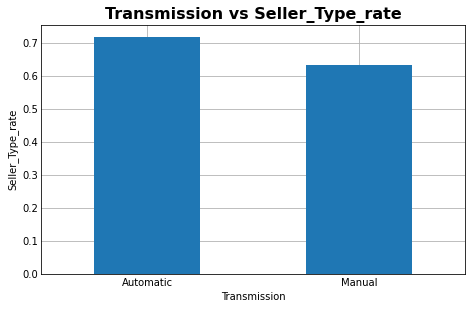

In [31]:
# plot the barplot of Transmission with average value of Seller_Type_rate:
%matplotlib inline
df3.groupby('Transmission')['Seller_Type_rate'].mean().plot.bar()
plt.title('Transmission vs Seller_Type_rate', fontsize=16, fontweight='bold')
plt.ylabel('Seller_Type_rate')
plt.xticks(rotation=0)
plt.show()

#### <font color="orange"> 3.5. Multivaiate Analysis: </font>

In [32]:
result = pd.pivot_table(data=df3, index='Fuel_Type', columns='Seller_Type', values='Transmission_rate')

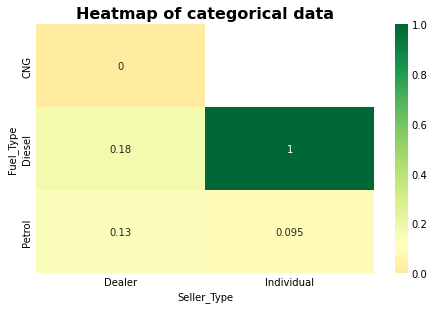

In [33]:
%matplotlib inline
sns.heatmap(result, annot=True, cmap='RdYlGn', center=0.117)
plt.title('Heatmap of categorical data', fontsize=16, fontweight='bold')
plt.show()

In [34]:
# Use for animation rotation at the end
# x_eye = -1.25
# y_eye = 2
# z_eye = 1

fig = px.scatter_3d(
        data_frame=df3,
        x='Present_Price',
        y='Age',
        z='Selling_Price',
        color='Seller_Type',
        color_discrete_sequence=['gray', 'yellow', 'green'],
        template='ggplot2',
        hover_name='Fuel_Type',
        # hover_data=
        opacity=0.6,
        # symbol='Transmission',
        # symbol_map=
        log_x=True,
        log_z=True,
        height=700,
        title=f'Selling_Price vs Present_Price, Age (color="Seller_Type", hover="Fuel_Type")'
)

# Use for animation rotation
# fig.update_layout(scene_camera_eye=dict(x=x_eye, y=y_eye, z=z_eye),
#                   updatemenus=[dict(type='buttons',
#                                     showactive=False,
#                                     y=1,
#                                     x=0.8,
#                                     xanchor='left',
#                                     yanchor='bottom',
#                                     pad=dict(t=45, r=10),
#                                     buttons=[dict(label='Play',
#                                                   method='animate',
#                                                   args=[None, dict(frame=dict(duration=250, redraw=True),
#                                                                    transition=dict(duration=0),
#                                                                    fromcurrent=True,
#                                                                    mode='immediate'
#                                                                    )]
#                                                   )
#                                              ]
#                                     )
#                                ]
#                   )


# def rotate_z(x, y, z, theta):
#     w = x + 1j * y
#     return np.real(np.exp(1j * theta) * w), np.imag(np.exp(1j * theta) * w), z


# frames = []

# for t in np.arange(0, 6.26, 0.1):
#     xe, ye, ze = rotate_z(x_eye, y_eye, z_eye, -t)
#     frames.append(go.Frame(layout=dict(scene_camera_eye=dict(x=xe, y=ye, z=ze))))
# fig.frames = frames
pio.show(fig)

In [35]:
# prepare the dataframe we use for modeling:
# " first we encoding Transmission, Seller_Type and 
# Fuel_Type by int number except 0 and 1 beacuse of
#  in more dimention 0 and 1 is constant "
df4 = df2.copy()
df4['Transmission'] = np.where(df4.Transmission == 'Automatic', 2, 3)
df4['Seller_Type'] = np.where(df4.Seller_Type == 'Dealer', 2, 3)
df4.Fuel_Type.replace({'Diesel':2, 'Petrol':3, 'CNG':4}, inplace=True)

df4

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,3,2,3,0,5
1,4.75,9.54,43000,2,2,3,0,6
2,7.25,9.85,6900,3,2,3,0,2
3,2.85,4.15,5200,3,2,3,0,8
4,4.60,6.87,42450,2,2,3,0,5
...,...,...,...,...,...,...,...,...
294,9.50,11.60,33988,2,2,3,0,3
295,4.00,5.90,60000,3,2,3,0,4
296,3.35,11.00,87934,3,2,3,0,10
297,11.50,12.50,9000,2,2,3,0,2


In [36]:
# pdp.ProfileReport(df4)

In [37]:
info_table = df4.describe().T
info_table.insert(8, 'isna', df4.isna().sum())
info_table.insert(9, 'type', df4.dtypes)
info_table

,count,mean,std,min,25%,50%,75%,max,isna,type
Selling_Price,299.0,4.589632,4.984240,0.10,0.85,3.51,6.00,35.0,0,float64
Present_Price,299.0,7.541037,8.567887,0.32,1.20,6.10,9.84,92.6,0,float64
Kms_Driven,299.0,36916.752508,39015.170352,500.00,15000.00,32000.00,48883.50,500000.0,0,int64
Fuel_Type,299.0,2.812709,0.407611,2.00,3.00,3.00,3.00,4.0,0,int64
Seller_Type,299.0,2.354515,0.479168,2.00,2.00,2.00,3.00,3.0,0,int32
Transmission,299.0,2.869565,0.337346,2.00,3.00,3.00,3.00,3.0,0,int32
Owner,299.0,0.043478,0.248720,0.00,0.00,0.00,0.00,3.0,0,int64
Age,299.0,5.384615,2.896868,1.00,3.00,5.00,7.00,16.0,0,int64


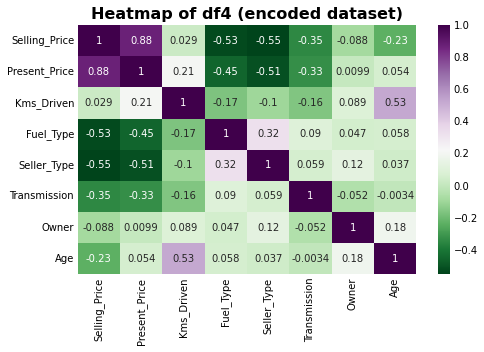

In [38]:
# again draw heatmap for see correlation between features in clean data
%matplotlib inline
sns.heatmap(df4.corr(), annot=True, cmap='PRGn_r')
plt.title('Heatmap of df4 (encoded dataset)', fontsize=16, fontweight='bold')
plt.show()

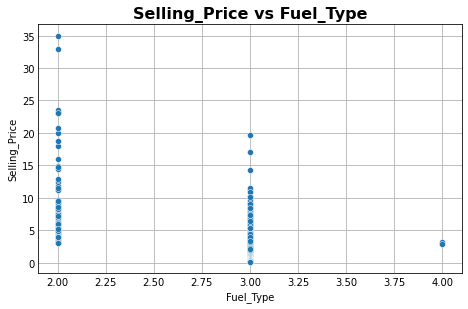

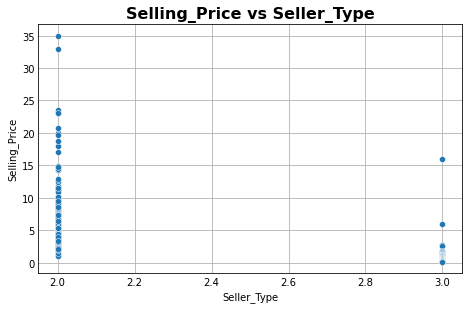

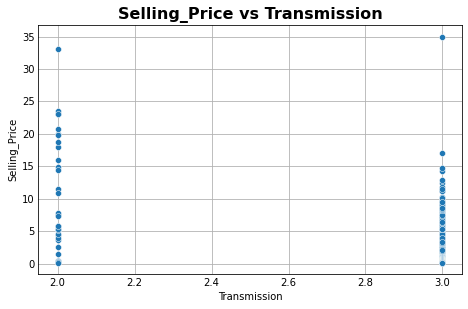

In [39]:
%matplotlib inline
for col in df4[['Fuel_Type','Seller_Type','Transmission']]:
    sns.scatterplot(data=df4, x=col, y='Selling_Price')
    plt.title(f'Selling_Price vs {col}', fontsize=16, fontweight='bold')
    plt.show()

In [40]:
# for store clean data for modeling
# df4.to_csv('clean_cardata.csv', index=False)
# df2.to_csv('prepare_cardata.csv', index=False)



## <font color="orange"> 4. Model: Linear Regression </font>

In [41]:
# This dataset use for create Linear Regression Model
df4

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,3,2,3,0,5
1,4.75,9.54,43000,2,2,3,0,6
2,7.25,9.85,6900,3,2,3,0,2
3,2.85,4.15,5200,3,2,3,0,8
4,4.60,6.87,42450,2,2,3,0,5
...,...,...,...,...,...,...,...,...
294,9.50,11.60,33988,2,2,3,0,3
295,4.00,5.90,60000,3,2,3,0,4
296,3.35,11.00,87934,3,2,3,0,10
297,11.50,12.50,9000,2,2,3,0,2


In [42]:
# normalize by MinMaxScaler:
# we normalize only Present_Price, Kms_Drvien and Age because
# other feature in between 1 to 4 and no need to normalize
scaler = MinMaxScaler(feature_range=(1,4))
norm = scaler.fit_transform(df4[['Present_Price', 'Kms_Driven','Age']])
norm = pd.DataFrame(norm, columns=['Present_Price', 'Kms_Driven','Age'])
norm = pd.concat([norm, df4[['Fuel_Type','Seller_Type',	'Transmission',	'Owner', 'Selling_Price']]], axis=1)
norm

,Present_Price,Kms_Driven,Age,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,1.171326,1.159159,1.8,3,2,3,0,3.35
1,1.299740,1.255255,2.0,2,2,3,0,4.75
2,1.309818,1.038438,1.2,3,2,3,0,7.25
3,1.124512,1.028228,2.4,3,2,3,0,2.85
4,1.212939,1.251952,1.8,2,2,3,0,4.60
...,...,...,...,...,...,...,...,...
294,1.366710,1.201129,1.4,2,2,3,0,9.50
295,1.181404,1.357357,1.6,3,2,3,0,4.00
296,1.347204,1.525129,2.8,3,2,3,0,3.35
297,1.395969,1.051051,1.2,2,2,3,0,11.50


In [43]:
# create CarPredModel class for fit model, cross validation, plotting and testing model
%matplotlib inline

CV = []
R2_train = []
R2_test = []
MAE_train = []
MAE_test = []

class CarPredModel:
    def __init__(self, x, y, test_size=0.3):
        """get x, y and test_size from user
            x(Dataframe): features
            y(Dataframe_1d): target
            test_size(float): for train test split
        """
        self.x = x
        self.y = y
        self.test_size = test_size

    
    def fit_model(self):
        """
        fit model on x and y
        claculate R2, MSE and MAE for train and test
        """
        # train_test_split
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(
            self.x, self.y, test_size=self.test_size, random_state=0)
        
        # fit model
        self.model = LinearRegression()
        self.model.fit(self.x_train, self.y_train)

        # R2 Score of train set:
        self.y_pred_train = self.model.predict(self.x_train)
        self.r2_train_model = metrics.r2_score(self.y_train, self.y_pred_train)
        # MAE and MSE of train set:
        self.mae_train_model = metrics.mean_absolute_error(self.y_train, self.y_pred_train)

        # R2 Score of test set:
        self.y_pred_test = self.model.predict(self.x_test)
        self.r2_test_model = metrics.r2_score(self.y_test, self.y_pred_test)
        # MAE and MSE of train set:
        self.mae_test_model = metrics.mean_absolute_error(self.y_test, self.y_pred_test)
        self.mse_test_model = metrics.mean_squared_error(self.y_test, self.y_pred_test)


    def cross(self, k):
        """
        Perform cross validation
        printing result of model
        """
        # R2 mean of train set using Cross validation:
        kf = KFold(k)
        self.cross_val = cross_val_score(self.model, self.x_train, self.y_train, cv=kf, scoring='r2')
        self.cv_mean = np.mean(self.cross_val)

        
        # Printing results
        print('='*30,'Shape','='*30)
        print("x train: ",self.x_train.shape)
        print("x test: ",self.x_test.shape)
        print("y train: ",self.y_train.shape)
        print("y test: ",self.y_test.shape)
        print('='*30,'R2_score and CV','='*30)
        print("Train R2-score :", round(self.r2_train_model, 3))
        print("Test R2-score :", round(self.r2_test_model, 3))
        print("Train MAE :", round(self.mae_train_model, 3))
        print("Test MAE :", round(self.mae_test_model, 3))
        print("Train CV scores :", self.cross_val)
        print("Train CV mean :", round(self.cv_mean, 3))

    def plot_graph(self):
        """
        plotting the result
        """
        # Plotting Graphs 
        # Residual Plot of train data
        fig, ax = plt.subplots(1,3,figsize = (15,4))
        ax[0].set_title('Residual Plot of Train samples', fontsize=14, fontweight='bold')
        sns.histplot((self.y_train-self.y_pred_train), kde=True, ax = ax[0])
        ax[0].set_xlabel('y_train - y_pred_train')
        # Y_test vs Y_pred_test scatter plot
        ax[1].set_title('y_test vs y_pred_test', fontsize=14, fontweight='bold')
        ax[1].scatter(x = self.y_test, y = self.y_pred_test)
        ax[1].set_xlabel('y_test')
        ax[1].set_ylabel('y_pred_test')
        # MAE_test vs MAE_train line plot
        ax[2].set_title('MAE test vs MAE train', fontsize=14, fontweight='bold')
        sns.lineplot(data=pd.DataFrame({'MAE_train': MAE_train, 'MAE_test': MAE_test}), markers=True)
        ax[2].set_xlabel('M')
        ax[2].set_ylabel('MAE')

        plt.show()

        # Print results of model again
        print("Train R2-score :", round(self.r2_train_model, 3))
        print("Test R2-score :", round(self.r2_test_model, 3))

    def append_result(self):
        """store R2, MAE and CV"""
        R2_train.append(round(self.r2_train_model, 3))
        MAE_train.append(round(self.mae_train_model, 3))
        R2_test.append(round(self.r2_test_model, 3))
        MAE_test.append(round(self.mae_test_model, 3))
        CV.append(round(self.cv_mean, 3))

    def show_weight(self):
        """create table of coef and intercept of model"""
        # The parameters for linear regression model
        parameter = ['b']+ ['w_' + str(i) for i in range(1,self.x.shape[1]+1)]
        columns = ['intercept'] + self.x.columns.to_list()
        weight_table = pd.DataFrame({'Parameter': parameter, 'Columns': columns})
        sk_weight = [i for i in self.model.intercept_] + self.model.coef_.tolist()[0]
        weight_table = weight_table.join(pd.Series(sk_weight, name='Sk_weight'))
        return weight_table

First we create model by split data to test_size = 0.2

In [44]:
# create 1st model by all feature by 1 dimension
norm1 = norm.copy()
x = norm1.drop('Selling_Price', axis='columns')
y = norm1.Selling_Price.values.reshape(-1,1)

In [45]:
model1 = CarPredModel(x, y, 0.2)
model1.fit_model()
model1.cross(5)

============================== Shape ==============================
x train:  (239, 7)
x test:  (60, 7)
y train:  (239, 1)
y test:  (60, 1)
============================== R2_score and CV ==============================
Train R2-score : 0.891
Test R2-score : 0.759
Train MAE : 1.12
Test MAE : 1.276
Train CV scores : [0.8349432  0.775177   0.88763036 0.769989   0.66804644]
Train CV mean : 0.787


In [46]:
model1.cross(10)

============================== Shape ==============================
x train:  (239, 7)
x test:  (60, 7)
y train:  (239, 1)
y test:  (60, 1)
============================== R2_score and CV ==============================
Train R2-score : 0.891
Test R2-score : 0.759
Train MAE : 1.12
Test MAE : 1.276
Train CV scores : [0.85059935 0.78040354 0.74247225 0.80458231 0.91718101 0.86197372
 0.69297633 0.85668824 0.52906859 0.87159372]
Train CV mean : 0.791


No fold problem so continue

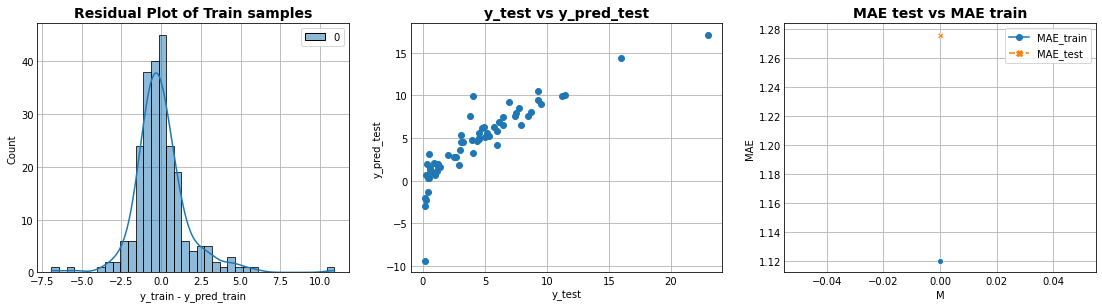

Train R2-score : 0.891
Test R2-score : 0.759


,Parameter,Columns,Sk_weight
0,b,intercept,7.286058
1,w_1,Present_Price,13.518100
2,w_2,Kms_Driven,-3.294581
3,w_3,Age,-1.547282
4,w_4,Fuel_Type,-1.831583
5,w_5,Seller_Type,-1.429887
6,w_6,Transmission,-1.360115
7,w_7,Owner,-0.904754


In [47]:
model1.append_result()
model1.plot_graph()
model1.show_weight()

## <font color="orange"> 5. Improve model </font>

In [48]:
# replace log10 of Age and Kms_Driven instead of Age and Kms_Driven
norm1['log_Age'] = np.log10(norm1.Age)
norm1['log_Kms_Driven'] = np.log10(norm1.Kms_Driven)
x = norm1.drop(['Selling_Price','Age','Kms_Driven'], axis='columns')
y = norm1.Selling_Price.values.reshape(-1,1)

In [49]:
model2 = CarPredModel(x,y,0.2)
model2.fit_model()
model2.cross(5)

============================== Shape ==============================
x train:  (239, 7)
x test:  (60, 7)
y train:  (239, 1)
y test:  (60, 1)
============================== R2_score and CV ==============================
Train R2-score : 0.895
Test R2-score : 0.816
Train MAE : 1.133
Test MAE : 1.211
Train CV scores : [0.8390934  0.78273651 0.89343151 0.7674368  0.70801914]
Train CV mean : 0.798


In [50]:
model2.cross(10)

============================== Shape ==============================
x train:  (239, 7)
x test:  (60, 7)
y train:  (239, 1)
y test:  (60, 1)
============================== R2_score and CV ==============================
Train R2-score : 0.895
Test R2-score : 0.816
Train MAE : 1.133
Test MAE : 1.211
Train CV scores : [0.85742264 0.77367053 0.75213112 0.8112471  0.91792154 0.87695325
 0.6896132  0.86290639 0.60640941 0.86849727]
Train CV mean : 0.802


No fold problem so continue

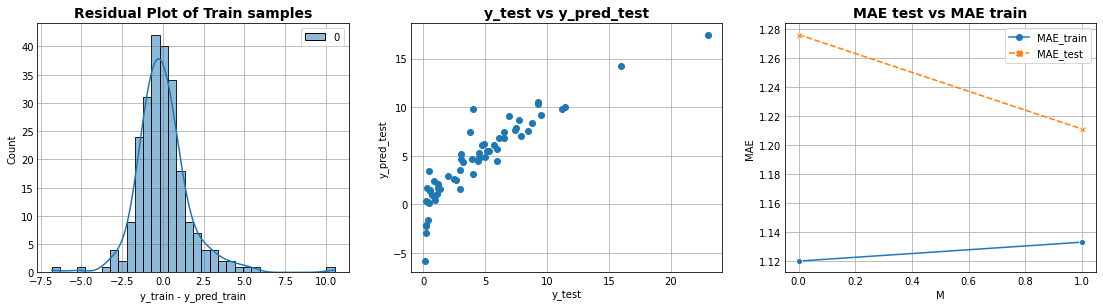

Train R2-score : 0.895
Test R2-score : 0.816


,Parameter,Columns,Sk_weight
0,b,intercept,3.233944
1,w_1,Present_Price,13.516467
2,w_2,Fuel_Type,-1.905623
3,w_3,Seller_Type,-1.511382
4,w_4,Transmission,-1.246690
5,w_5,Owner,-0.893877
6,w_6,log_Age,-7.608708
7,w_7,log_Kms_Driven,-10.445437


In [51]:
model2.append_result()
model2.plot_graph()
model2.show_weight()

In [52]:
# add new feature that is combine of Present_price and Age
norm1['p_price_log_age'] = norm1.Present_Price * norm1.log_Age 
x = norm1.drop(['Selling_Price','Age','Kms_Driven'], axis='columns')
y = norm1.Selling_Price.values.reshape(-1,1)

In [53]:
model3 = CarPredModel(x,y, 0.2)
model3.fit_model()
model3.cross(5)

============================== Shape ==============================
x train:  (239, 8)
x test:  (60, 8)
y train:  (239, 1)
y test:  (60, 1)
============================== R2_score and CV ==============================
Train R2-score : 0.977
Test R2-score : 0.958
Train MAE : 0.521
Test MAE : 0.613
Train CV scores : [0.9809328  0.90228594 0.98463945 0.92894555 0.94636522]
Train CV mean : 0.949


In [54]:
model3.cross(10)

============================== Shape ==============================
x train:  (239, 8)
x test:  (60, 8)
y train:  (239, 1)
y test:  (60, 1)
============================== R2_score and CV ==============================
Train R2-score : 0.977
Test R2-score : 0.958
Train MAE : 0.521
Test MAE : 0.613
Train CV scores : [0.98988617 0.95702983 0.8581608  0.91719927 0.98765264 0.9791456
 0.93779576 0.95905229 0.94646596 0.94593419]
Train CV mean : 0.948


No fold problem so continue

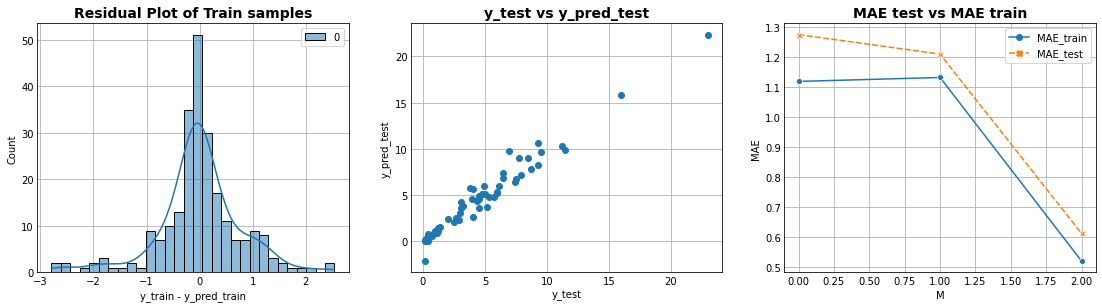

Train R2-score : 0.977
Test R2-score : 0.958


,Parameter,Columns,Sk_weight
0,b,intercept,-25.591580
1,w_1,Present_Price,29.316917
2,w_2,Fuel_Type,-1.012909
3,w_3,Seller_Type,-0.260600
4,w_4,Transmission,0.148974
5,w_5,Owner,-0.245715
6,w_6,log_Age,45.786734
7,w_7,log_Kms_Driven,-4.482730
8,w_8,p_price_log_age,-45.095192


In [55]:
model3.append_result()
model3.plot_graph()
model3.show_weight()

In [56]:
# add new feature that is combine of Present_Price and Fuel_Type
norm1['p_price_fuel'] = (norm1.Present_Price) * norm1.Fuel_Type
x = norm1.drop(['Selling_Price','Age','Kms_Driven'], axis='columns')
y = norm1.Selling_Price.values.reshape(-1,1)

In [57]:
model4 = CarPredModel(x,y,0.2)
model4.fit_model()
model4.cross(5)

============================== Shape ==============================
x train:  (239, 9)
x test:  (60, 9)
y train:  (239, 1)
y test:  (60, 1)
============================== R2_score and CV ==============================
Train R2-score : 0.98
Test R2-score : 0.97
Train MAE : 0.491
Test MAE : 0.533
Train CV scores : [0.98489699 0.92364278 0.98450191 0.95986955 0.95008301]
Train CV mean : 0.961


In [58]:
model4.cross(10)

============================== Shape ==============================
x train:  (239, 9)
x test:  (60, 9)
y train:  (239, 1)
y test:  (60, 1)
============================== R2_score and CV ==============================
Train R2-score : 0.98
Test R2-score : 0.97
Train MAE : 0.491
Test MAE : 0.533
Train CV scores : [0.99315933 0.96287799 0.90815184 0.92805538 0.98475724 0.98166455
 0.96988375 0.95271458 0.93496345 0.95925726]
Train CV mean : 0.958


No fold problem so continue

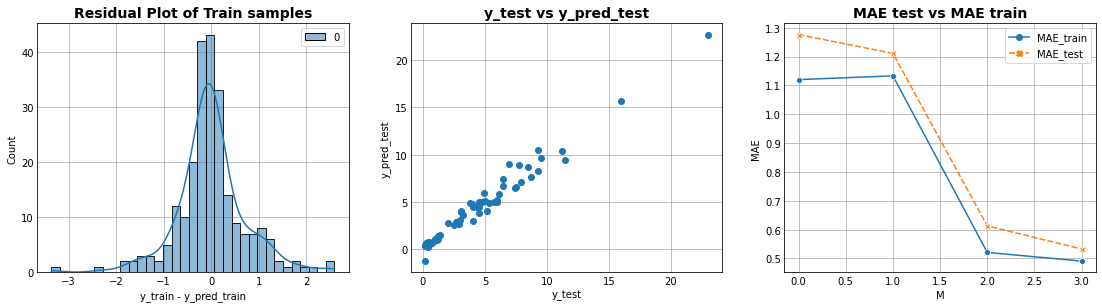

Train R2-score : 0.98
Test R2-score : 0.97


,Parameter,Columns,Sk_weight
0,b,intercept,-34.382040
1,w_1,Present_Price,36.652793
2,w_2,Fuel_Type,3.109215
3,w_3,Seller_Type,-0.797676
4,w_4,Transmission,0.121692
5,w_5,Owner,0.058010
6,w_6,log_Age,47.593555
7,w_7,log_Kms_Driven,-3.124048
8,w_8,p_price_log_age,-46.808477
9,w_9,p_price_fuel,-3.087591


In [59]:
model4.append_result()
model4.plot_graph()
model4.show_weight()

Model for is best model so far by r2 score = 0.97

Now we check model for split data to test_size = 0.3

In [60]:
# Delete previous data
R2_train = []
R2_test = []
MAE_train = []
MAE_test = []

In [61]:
# create 1st model by all feature with 1 dimension
norm2 = norm.copy()
x = norm2.drop('Selling_Price', axis='columns')
y = norm2.Selling_Price.values.reshape(-1,1)

In [62]:
model1 = CarPredModel(x, y, 0.3)
model1.fit_model()
model1.cross(5)

============================== Shape ==============================
x train:  (209, 7)
x test:  (90, 7)
y train:  (209, 1)
y test:  (90, 1)
============================== R2_score and CV ==============================
Train R2-score : 0.898
Test R2-score : 0.816
Train MAE : 1.106
Test MAE : 1.2
Train CV scores : [0.75302418 0.89326277 0.82831457 0.84139808 0.74085689]
Train CV mean : 0.811


In [63]:
model1.cross(10)

============================== Shape ==============================
x train:  (209, 7)
x test:  (90, 7)
y train:  (209, 1)
y test:  (90, 1)
============================== R2_score and CV ==============================
Train R2-score : 0.898
Test R2-score : 0.816
Train MAE : 1.106
Test MAE : 1.2
Train CV scores : [0.80359201 0.67025161 0.83378637 0.88431655 0.68754765 0.83227673
 0.85262142 0.82428823 0.69572915 0.86698569]
Train CV mean : 0.795


No fold problem so continue

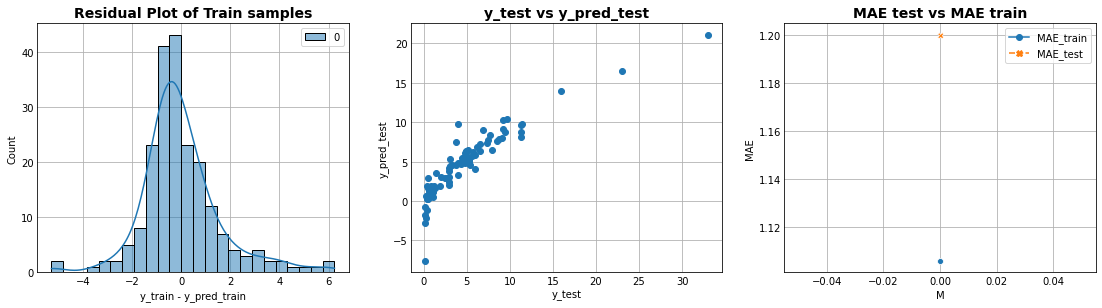

Train R2-score : 0.898
Test R2-score : 0.816


,Parameter,Columns,Sk_weight
0,b,intercept,6.722590
1,w_1,Present_Price,12.861265
2,w_2,Kms_Driven,-2.654794
3,w_3,Age,-1.492181
4,w_4,Fuel_Type,-1.686090
5,w_5,Seller_Type,-1.535057
6,w_6,Transmission,-1.260529
7,w_7,Owner,-0.960313


In [64]:
model1.append_result()
model1.plot_graph()
model1.show_weight()

In [65]:
# replace log10 of Age and Kms_Driven instead of Age and Kms_Driven
norm2['log_Age'] = np.log10(norm2.Age)
norm2['log_Kms_Driven'] = np.log10(norm2.Kms_Driven)
x = norm2.drop(['Selling_Price','Age','Kms_Driven'], axis='columns')
y = norm2.Selling_Price.values.reshape(-1,1)


In [66]:
model2 = CarPredModel(x,y,0.3)
model2.fit_model()
model2.cross(5)

============================== Shape ==============================
x train:  (209, 7)
x test:  (90, 7)
y train:  (209, 1)
y test:  (90, 1)
============================== R2_score and CV ==============================
Train R2-score : 0.902
Test R2-score : 0.838
Train MAE : 1.109
Test MAE : 1.171
Train CV scores : [0.75769991 0.89502255 0.83245877 0.84599322 0.77610876]
Train CV mean : 0.821


In [67]:
model2.cross(10)

============================== Shape ==============================
x train:  (209, 7)
x test:  (90, 7)
y train:  (209, 1)
y test:  (90, 1)
============================== R2_score and CV ==============================
Train R2-score : 0.902
Test R2-score : 0.838
Train MAE : 1.109
Test MAE : 1.171
Train CV scores : [0.80327943 0.67437144 0.8336546  0.88711528 0.72943723 0.83507374
 0.84437453 0.83821355 0.75069821 0.86479018]
Train CV mean : 0.806


No fold problem so continue

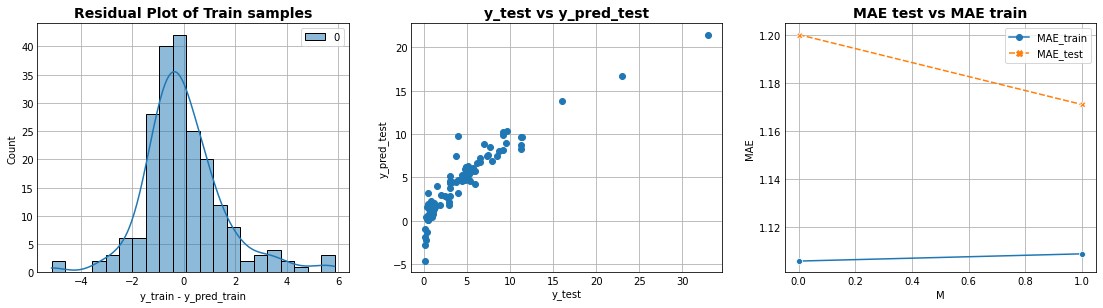

Train R2-score : 0.902
Test R2-score : 0.838


,Parameter,Columns,Sk_weight
0,b,intercept,3.342279
1,w_1,Present_Price,12.872216
2,w_2,Fuel_Type,-1.743851
3,w_3,Seller_Type,-1.612563
4,w_4,Transmission,-1.177259
5,w_5,Owner,-0.963907
6,w_6,log_Age,-7.387170
7,w_7,log_Kms_Driven,-8.326106


In [68]:
model2.append_result()
model2.plot_graph()
model2.show_weight()

In [69]:
# add new feature that is combine of Present_price and Age
norm2['p_price_log_age'] = norm2.Present_Price * norm2.log_Age 
x = norm2.drop(['Selling_Price','Age','Kms_Driven'], axis='columns')
y = norm2.Selling_Price.values.reshape(-1,1)

In [70]:
model3 = CarPredModel(x,y,0.3)
model3.fit_model()
model3.cross(5)

============================== Shape ==============================
x train:  (209, 8)
x test:  (90, 8)
y train:  (209, 1)
y test:  (90, 1)
============================== R2_score and CV ==============================
Train R2-score : 0.975
Test R2-score : 0.973
Train MAE : 0.528
Test MAE : 0.581
Train CV scores : [0.91301788 0.97330299 0.93573513 0.96182645 0.9563889 ]
Train CV mean : 0.948


No fold problem so continue

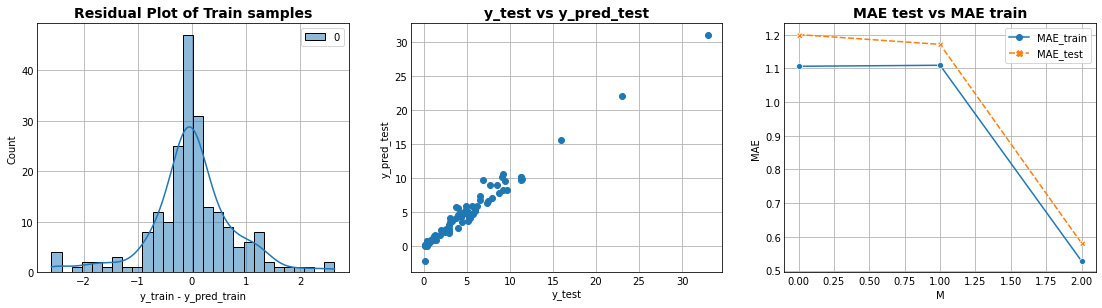

Train R2-score : 0.975
Test R2-score : 0.973


,Parameter,Columns,Sk_weight
0,b,intercept,-25.165353
1,w_1,Present_Price,28.870059
2,w_2,Fuel_Type,-0.989498
3,w_3,Seller_Type,-0.263381
4,w_4,Transmission,0.161958
5,w_5,Owner,-0.234038
6,w_6,log_Age,44.367905
7,w_7,log_Kms_Driven,-4.470404
8,w_8,p_price_log_age,-43.984648


In [71]:
model3.append_result()
model3.plot_graph()
model3.show_weight()

In [72]:
# add new feature that is combine of Present_Price and Fuel_Type
norm2['p_price_fuel'] = (norm2.Present_Price) * norm2.Fuel_Type
x = norm2.drop(['Selling_Price','Age','Kms_Driven'], axis='columns')
y = norm2.Selling_Price.values.reshape(-1,1)

In [73]:
model4 = CarPredModel(x,y,0.3)
model4.fit_model()
model4.cross(5)

============================== Shape ==============================
x train:  (209, 9)
x test:  (90, 9)
y train:  (209, 1)
y test:  (90, 1)
============================== R2_score and CV ==============================
Train R2-score : 0.978
Test R2-score : 0.98
Train MAE : 0.497
Test MAE : 0.513
Train CV scores : [0.93618473 0.96797633 0.96153264 0.94368908 0.96611155]
Train CV mean : 0.955


In [74]:
model4.cross(10)

============================== Shape ==============================
x train:  (209, 9)
x test:  (90, 9)
y train:  (209, 1)
y test:  (90, 1)
============================== R2_score and CV ==============================
Train R2-score : 0.978
Test R2-score : 0.98
Train MAE : 0.497
Test MAE : 0.513
Train CV scores : [0.97034395 0.86179438 0.9375443  0.98301629 0.94076204 0.95571301
 0.94690072 0.95157377 0.97845702 0.95286615]
Train CV mean : 0.948


No fold problem so continue

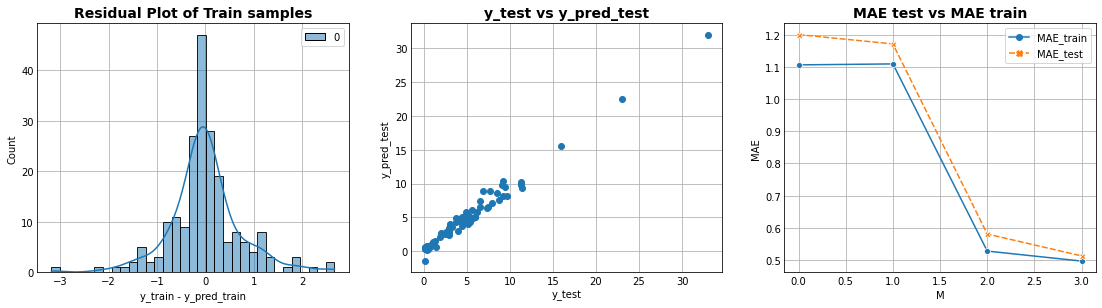

Train R2-score : 0.978
Test R2-score : 0.98


,Parameter,Columns,Sk_weight
0,b,intercept,-34.183948
1,w_1,Present_Price,36.352647
2,w_2,Fuel_Type,3.082881
3,w_3,Seller_Type,-0.792520
4,w_4,Transmission,0.147794
5,w_5,Owner,0.096252
6,w_6,log_Age,47.046451
7,w_7,log_Kms_Driven,-3.359868
8,w_8,p_price_log_age,-46.358963
9,w_9,p_price_fuel,-3.044258


In [75]:
model4.append_result()
model4.plot_graph()
model4.show_weight()

As seen, there is not much difference between the model for test size 0.2 and 0.3, but considering that the model based on test size 0.3 shows higher accuracy, we continue working with this model.

## <font color="orange"> 6. Visualization Final_Model </font>

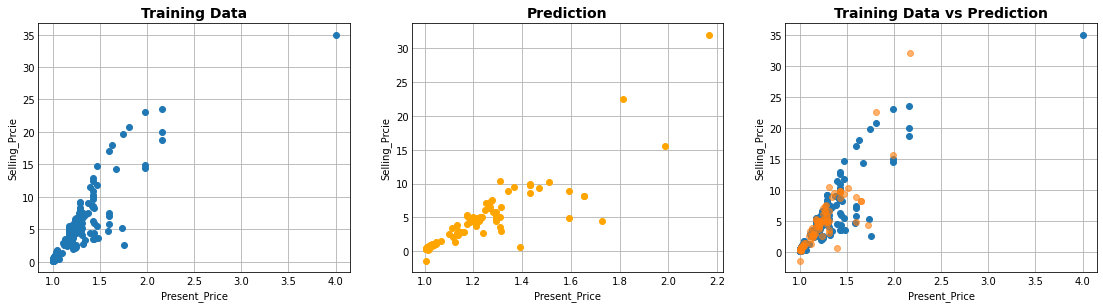

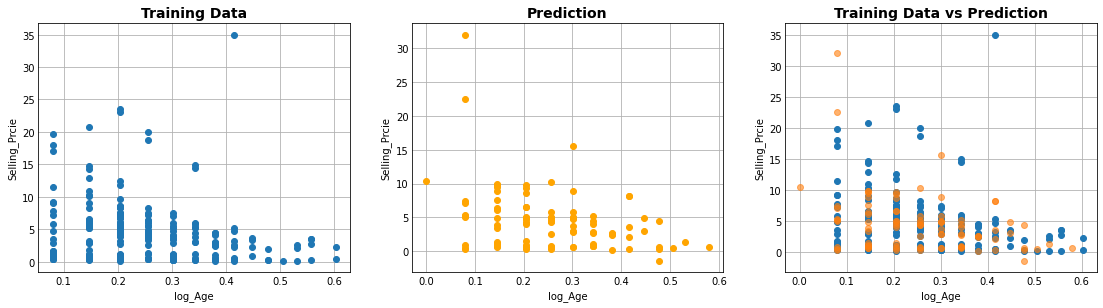

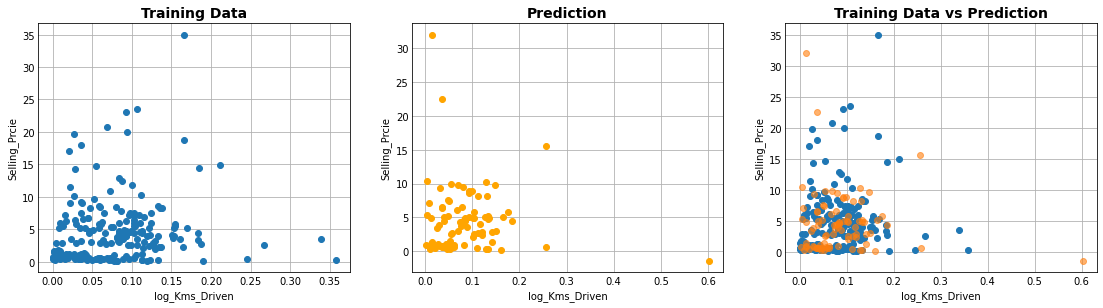

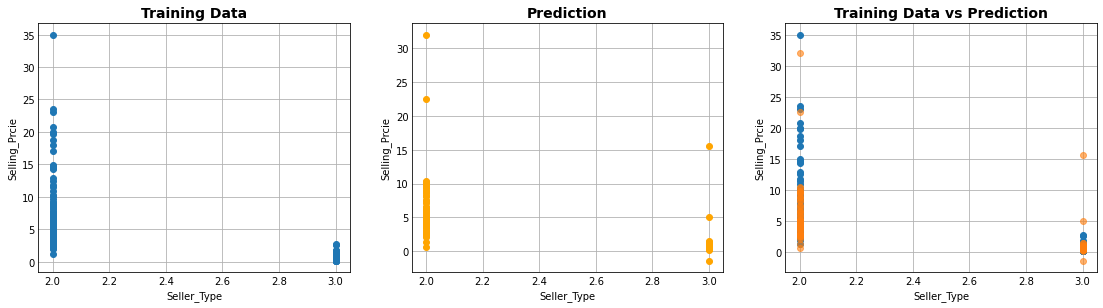

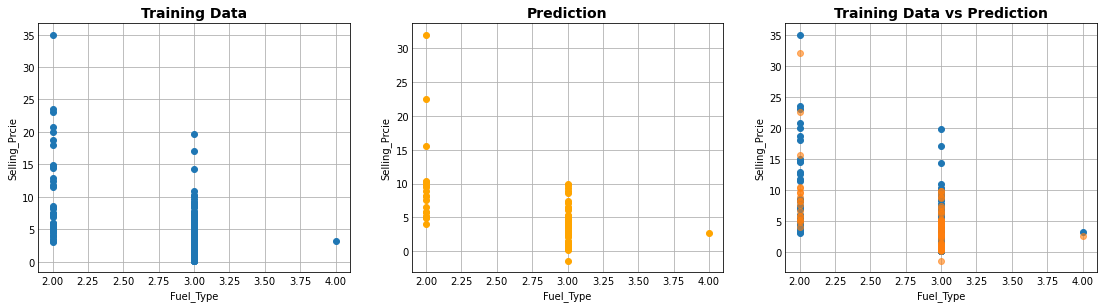

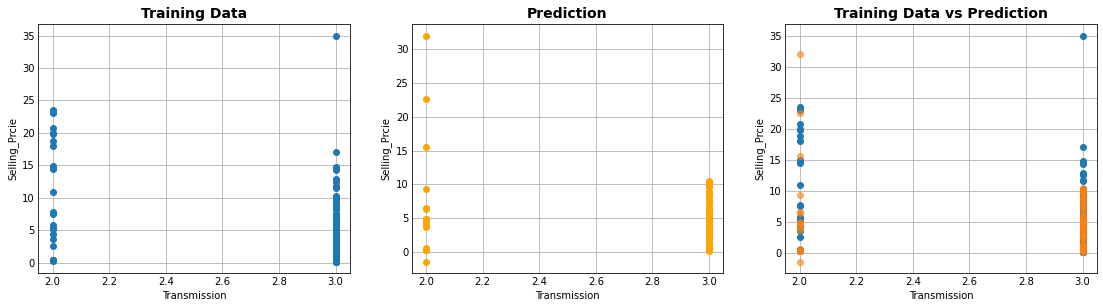

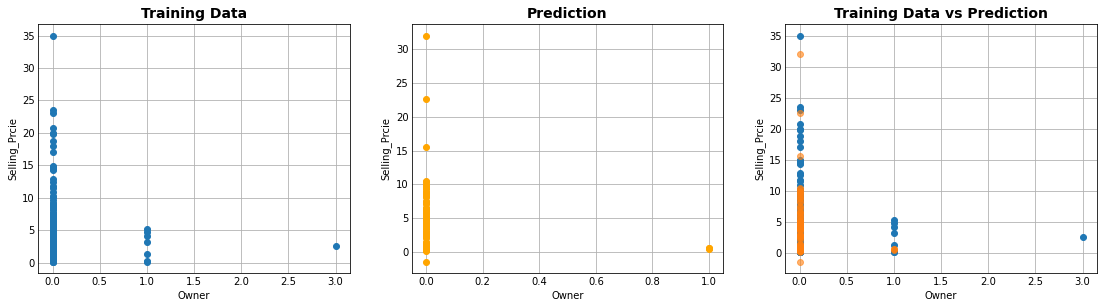

In [76]:
# Visualization the final model (model4):
%matplotlib inline
b = model4.y_train
d = model4.y_pred_test
columns = ['Present_Price','log_Age','log_Kms_Driven','Seller_Type','Fuel_Type','Transmission','Owner']
for col in columns:
    a = model4.x_train[col]
    c = model4.x_test[col]

    fig , ax = plt.subplots(1,3, figsize=(15,4))
    ax[0].scatter(a, b, label='real')
    ax[0].set_title('Training Data', fontsize=14, fontweight='bold')
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Selling_Prcie')
    ax[1].scatter(c, d, label='predict', color='orange')
    ax[1].set_title('Prediction', fontsize=14, fontweight='bold')
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('Selling_Prcie')
    ax[2].scatter(a, b, label='real')
    ax[2].scatter(c, d, label='predict', alpha=.6)
    ax[2].set_title('Training Data vs Prediction', fontsize=14, fontweight='bold')
    ax[2].set_xlabel(col)
    ax[2].set_ylabel('Selling_Prcie')

    plt.show()

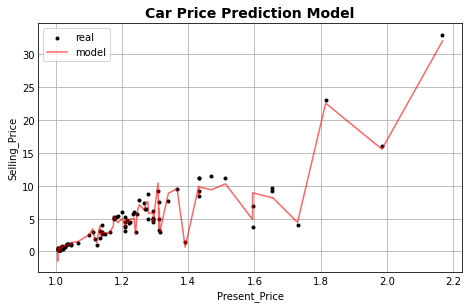

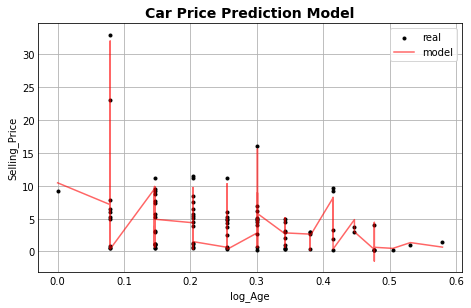

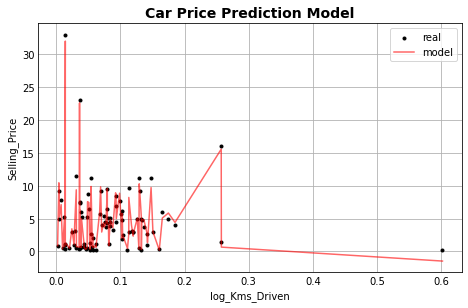

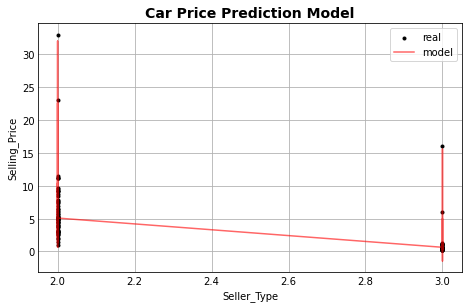

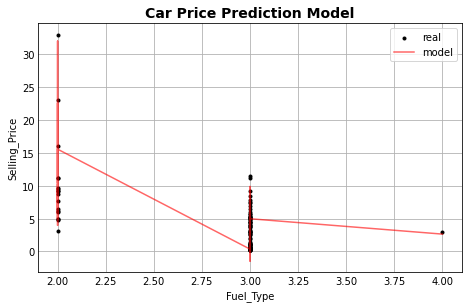

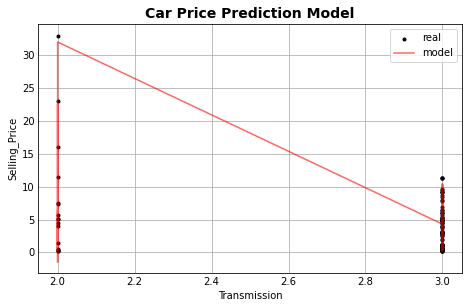

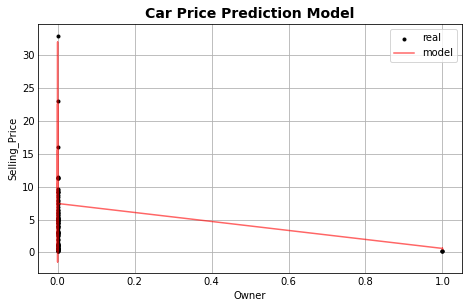

In [77]:
# compare the real data and car price prediction model
%matplotlib inline

model4.x_test.insert(0, 'y_test', model4.y_test)
model4.x_test.insert(0, 'y_pred', model4.y_pred_test)

for col in columns:
    new_df = model4.x_test.sort_values(by=[col])
    plt.scatter(new_df[col], new_df.y_test, marker='.', color='black', label='real')
    plt.plot(new_df[col], new_df.y_pred, color='r', alpha=0.6, label='model')
    plt.title('Car Price Prediction Model', fontsize=14, fontweight='bold')
    plt.xlabel(f'{col}')
    plt.ylabel('Selling_Price')
    plt.legend()
    plt.show()

Mean Absolut Error: 0.5133584181777009
Mean Squared Error: 0.49269717242227434
R2 Score: 0.9796347676637326


Text(0, 0.5, 'MAE')

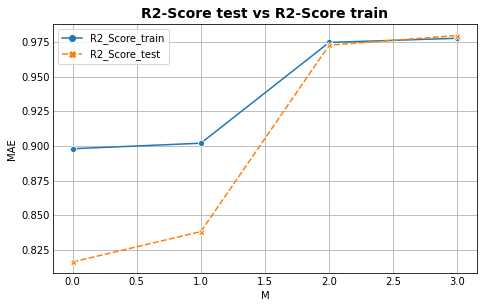

In [78]:
print(f'Mean Absolut Error: {model4.mae_test_model}')
print(f'Mean Squared Error: {model4.mse_test_model}')
print(f'R2 Score: {model4.r2_test_model}')
# MAE_test vs MAE_train line plot
sns.lineplot(data=pd.DataFrame({'R2_Score_train': R2_train, 'R2_Score_test': R2_test}), markers=True)
plt.title('R2-Score test vs R2-Score train', fontsize=14, fontweight='bold')
plt.xlabel('M')
plt.ylabel('MAE')

## <font color="orange"> 7. Predict sample data </font>

In [80]:
# now create model on all of data without split (train + test)
# Considering that we have not deleted any part of the dataset so far, 
# we will use the same df4 to create x and y.
x = df4.drop('Selling_Price', axis=1)
y = df4.Selling_Price.values.reshape(-1,1)

# add sample row to x dataframe
cols_name = ['Present_Price','Age','Kms_Driven','Seller_Type','Fuel_Type','Transmission','Owner']
print("Please enter the value of each feature: ")
print("(in Seller_Type: 2=Dealer , 3=Individual")
print(" in Fuel_Type: 2=Diesel , 3=Petrol , 4=CNG")
print(" in Transmission: 2=Automatic , 3=Manual)")
print("-"*40)

sample = pd.DataFrame()
for col in cols_name:
    sample[col] = [float(input(f"{col}: "))]

# define train and test dataframe for fit model and predict
x = pd.concat([x,sample])
x['log_Age'] = np.log10(x['Age'])
x['log_Kms_Driven'] = np.log10(x['Kms_Driven'])
x['p_price_log_age'] = x['Present_Price'] * x['log_Age']
x['p_price_fuel'] = x['Present_Price'] * x['Fuel_Type']
x = x.drop(['Age', 'Kms_Driven'], axis=1)
x_train = x[:len(x)-1]
x_test = x[len(x)-1:]
y_train = y

# fit model 
final_model = LinearRegression()
final_model.fit(x_train, y_train)

# The parameters for linear regression model
print("Table of coef and intercept of model:\n")
final_params = ['b']+ ['w_' + str(i) for i in range(1,x.shape[1]+1)]
param_name = ['intercept'] + x.columns.to_list()
final_weight_table = pd.DataFrame({'final_params': final_params, 'Columns': param_name})
sk_weight = [i for i in final_model.intercept_] + final_model.coef_.tolist()[0]
final_weight_table = final_weight_table.join(pd.Series(sk_weight, name='Sk_weight'))
print(final_weight_table, '\n')

# predict sample
y_pred = final_model.predict(x_test)
print('='*25)
print(f"  Selling Price: {round(y_pred[0][0], 4)}")
print('='*25)

Please enter the value of each feature: 
(in Seller_Type: 2=Dealer , 3=Individual
 in Fuel_Type: 2=Diesel , 3=Petrol , 4=CNG
 in Transmission: 2=Automatic , 3=Manual)
----------------------------------------
Table of coef and intercept of model:

  final_params          Columns  Sk_weight
0            b        intercept   2.931488
1          w_1    Present_Price   1.413081
2          w_2        Fuel_Type   0.275727
3          w_3      Seller_Type  -0.994249
4          w_4     Transmission  -0.061159
5          w_5            Owner  -0.107422
6          w_6          log_Age   0.488793
7          w_7   log_Kms_Driven  -0.175271
8          w_8  p_price_log_age  -0.841340
9          w_9     p_price_fuel  -0.124871 

  Selling Price: 4.5592
